Dùng thư viện yahoo finace tải dataset

In [1]:
import yfinance as yf

data = yf.download(tickers = "6E=F", start="2017-12-01", end="2023-06-16", interval='1d')
data


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-01,1.19005,1.19500,1.18600,1.19030,1.19030,289430
2017-12-04,1.18785,1.18875,1.18380,1.18660,1.18660,170174
2017-12-05,1.18755,1.18855,1.18080,1.18230,1.18230,185404
2017-12-06,1.18370,1.18560,1.17880,1.17985,1.17985,197952
2017-12-07,1.18085,1.18210,1.17770,1.17790,1.17790,197235
...,...,...,...,...,...,...
2023-06-09,1.07880,1.07905,1.07475,1.07545,1.07545,230751
2023-06-12,1.07525,1.07945,1.07375,1.07600,1.07600,349852
2023-06-13,1.07600,1.08280,1.07600,1.07935,1.07935,535272


In [2]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-01,1.19005,1.19500,1.18600,1.19030,1.19030,289430
2017-12-04,1.18785,1.18875,1.18380,1.18660,1.18660,170174
2017-12-05,1.18755,1.18855,1.18080,1.18230,1.18230,185404
2017-12-06,1.18370,1.18560,1.17880,1.17985,1.17985,197952
2017-12-07,1.18085,1.18210,1.17770,1.17790,1.17790,197235
...,...,...,...,...,...,...
2023-06-09,1.07880,1.07905,1.07475,1.07545,1.07545,230751
2023-06-12,1.07525,1.07945,1.07375,1.07600,1.07600,349852
2023-06-13,1.07600,1.08280,1.07600,1.07935,1.07935,535272


In [3]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [4]:
data = data.reset_index('Date', inplace=False)

In [5]:
# 2. Đọc file dữ liệu giá vàng GC=F và chia train test validate theo tỉ lệ 7:2:1
data = data[['Close']]
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]
val_data = data[train_size+test_size:]

In [6]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [7]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [8]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[1.1636481  1.16365365 1.1636592  1.16366475 1.1636703  1.16367585
 1.16368141 1.16368696 1.16369251 1.16369806 1.16370361 1.16370916
 1.16371471 1.16372026 1.16372581 1.16373136 1.16373691 1.16374247
 1.16374802 1.16375357 1.16375912 1.16376467 1.16377022 1.16377577
 1.16378132 1.16378687 1.16379242 1.16379797 1.16380353 1.16380908]


In [9]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)


Validation RMSE: 0.08790060715379994
Testing RMSE: 0.10965587674949664


Validation RMSE: 0.08790060715379994
Testing RMSE: 0.10965587674949664


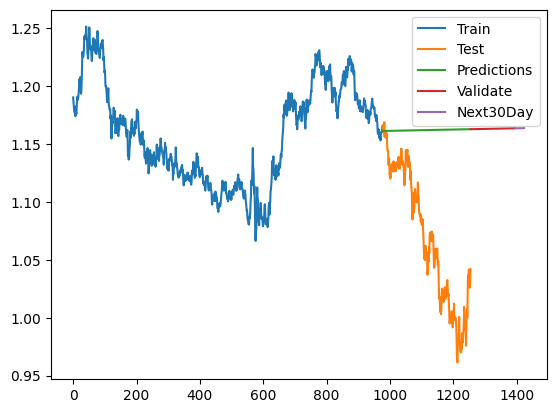

In [10]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()